### **Pre Processing SQL Questions and Answers**

In [5]:
import re
import json
import pandas as pd

def clean_text(text):
    """Normalize text: remove extra spaces, convert to lowercase, and clean formatting."""
    if pd.isnull(text):
        return ""

    text = text.strip()  # Removing leading/trailing spaces
    text = re.sub(r"\s+", " ", text)  # Removing extra spaces
    text = re.sub(r"^\d+\.\s*", "", text)  # Removing unnecessary numbering (e.g., "1. What is SQL?" → "What is SQL?")

    return text

def format_sql_queries(text):
    """Format SQL queries by ensuring SQL keywords remain properly capitalized."""
    sql_keywords = ["SELECT", "FROM", "WHERE", "JOIN", "INSERT", "DELETE", "UPDATE", "ORDER BY", "GROUP BY", "HAVING"]

    for keyword in sql_keywords:
        pattern = rf"\b{keyword.lower()}\b"
        text = re.sub(pattern, keyword, text, flags=re.IGNORECASE)  # Ensuring SQL commands are uppercase (Formatting)

    return text

def tokenize_text(text):
    """Tokenize text properly, capturing words, punctuation, and symbols."""
    return re.findall(r"\w+|\S", text)  # Tokenizing words and symbols correctly

def preprocess_and_tokenize(df):
    """Apply text preprocessing and tokenization to the dataset."""
    processed_data = []

    for _, row in df.iterrows():
        question = clean_text(row["Question"])
        answer = format_sql_queries(clean_text(row["Answer"]))
        level = row["Level"].strip().capitalize()  # Ensuring levels are properly formatted

        word_tokens_q = tokenize_text(question)
        word_tokens_a = tokenize_text(answer)

        processed_data.append({
            "Question": question,
            "Level": level,
            "Answer": answer,
            "Word_Tokens_Question": json.dumps(word_tokens_q),
            "Word_Tokens_Answer": json.dumps(word_tokens_a)
        })

    return pd.DataFrame(processed_data)

# Load dataset
file_path = "SQL_interview_questions_Final.csv"
df = pd.read_csv(file_path)

# Print first 10 rows BEFORE preprocessing
print("🔹 First 7 rows BEFORE Preprocessing:")
print(df.head(7))

# Check for null values
print("\n🔹 Checking for missing values:")
print(df.isnull().sum())

# Preprocess & tokenize
cleaned_df = preprocess_and_tokenize(df)

# Print first 10 rows AFTER preprocessing
print("\n🔹 First 7 rows AFTER Preprocessing:")
print(cleaned_df.head(7))

# Save as CSV
output_file = "preprocessed_sql_interview_QA_Final.csv"
cleaned_df.to_csv(output_file, index=False)

print(f"\n✅ Preprocessed data saved to {output_file}")


🔹 First 7 rows BEFORE Preprocessing:
                                            Question     Level  \
0                                    1. What is SQL?  Beginner   
1   2. What are the different types of SQL commands?  Beginner   
2                   3. What is a primary key in SQL?  beginner   
3                          4. What is a foreign key?  beginner   
4  5. Explain the difference between DELETE and T...  Beginner   
5  6. What is a JOIN in SQL, and what are its types?  Beginner   
6        7. What do you mean by a NULL value in SQL?  beginner   

                                              Answer  
0  SQL means Structured Query Language and is use...  
1  SELECT: Retrieves data from a database.INSERT:...  
2  It is a unique identifier for each record in a...  
3  It is a field in one table referencing the pri...  
4  The DELETE command is used by professionals to...  
5  A JOIN operation merges information from two o...  
6  A NULL value in SQL represents the absence of 

### **Pre processing NoSQL Questions and Answers**

In [8]:
import re
import pandas as pd
import unicodedata
import ast

def clean_text(text):
    """Normalize text: remove extra spaces, fix Unicode issues, and clean formatting."""
    if pd.isnull(text):
        return ""

    text = text.strip()  # Removing leading/trailing spaces
    text = re.sub(r"\s+", " ", text)  # Removing extra spaces
    text = re.sub(r"^\d+\.\s*", "", text)  # Removing numbering (e.g., "1. What is NoSQL?" → "What is NoSQL?")

    # Converting curly apostrophes to single apostrophe
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8")

    return text

def format_nosql_terms(text):
    """Ensure NoSQL database names and keywords are properly formatted."""
    nosql_keywords = ["MongoDB", "Cassandra", "Redis", "DynamoDB", "Neo4j", "HBase", "Bigtable"]

    for keyword in nosql_keywords:
        pattern = rf"\b{keyword.lower()}\b"
        text = re.sub(pattern, keyword, text, flags=re.IGNORECASE)  # Ensuring proper casing

    return text

def clean_answer(text):
    """Remove 'Ans:' or similar prefixes from the answer."""
    text = re.sub(r"^Ans[:\s]+", "", text, flags=re.IGNORECASE)  # Removing "Ans:" word from the Answer column
    return text

def tokenize_text(text):
    """Tokenize text and return as a proper list format."""
    return str(text.split())  # Converting tokenized output to string format to maintain list representation in CSV

def preprocess_and_tokenize(df):
    """Apply text preprocessing and tokenization to the NoSQL dataset."""

    # Apply all preprocessing steps
    df["Question"] = df["Question"].apply(clean_text)
    df["Answer"] = df["Answer"].apply(lambda x: format_nosql_terms(clean_answer(clean_text(x))))
    df["Level"] = df["Level"].str.strip().str.capitalize()  # Ensuring levels are properly formatted

    # Tokenize and store as properly formatted lists in CSV
    df["Tokenized_Question"] = df["Question"].apply(tokenize_text)
    df["Tokenized_Answer"] = df["Answer"].apply(tokenize_text)

    return df

# Load NoSQL dataset
file_path_nosql = "Nosql_interview_questions_Final.csv"  # Replacing with actual file path
df_nosql = pd.read_csv(file_path_nosql)

# Print first 10 rows BEFORE preprocessing
print("\n🔹 First 7 rows BEFORE Preprocessing:")
print(df_nosql.head(7))

# Check for missing values
print("\n🔹 Checking for missing values:")
print(df_nosql.isnull().sum())

# Preprocess & tokenize
cleaned_nosql_df = preprocess_and_tokenize(df_nosql)

# Print first 10 rows AFTER preprocessing
print("\n🔹 First 7 rows AFTER Preprocessing:")
print(cleaned_nosql_df.head(7))

# Save as CSV file
output_file_nosql = "preprocessed_nosql_QA_dataset_Final.csv"
cleaned_nosql_df.to_csv(output_file_nosql, index=False, quoting=1)  # Ensuring proper quoting

print(f"\n✅ Preprocessed NoSQL data saved to {output_file_nosql}")



🔹 First 7 rows BEFORE Preprocessing:
                                            Question     Level  \
0                                  1. What is NoSQL?  Beginner   
1               2.Comparison Between NoSQL & RDBMS ?  Beginner   
2                  3. What are the options of NoSQL?  Beginner   
3  4.Make a case for the distinction between NoSQ...  Beginner   
4  5.A way to script NoSQL sound unit configuration?  Beginner   
5  6. Will NoSQL information act With Oracle Data...  Beginner   
6           7. What is a prophetess knowledge Model?  Beginner   

                                              Answer  
0  Ans: NoSQL encompasses a good kind of complete...  
1  Ans: NoSQL is completely different from RDBMS ...  
2  Ans: When compared to relative databases, NoSQ...  
3  Ans: The history looks to seem like this : Goo...  
4  Ans: These are as amenable to scripting as the...  
5  Ans: NoSQL information supports retrieving rec...  
6  Ans: Cassandra knowledge model consists of 4 

<ipython-input-14-92500e6aadec>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts_sql.index, y=level_counts_sql.values, palette="Blues_r")


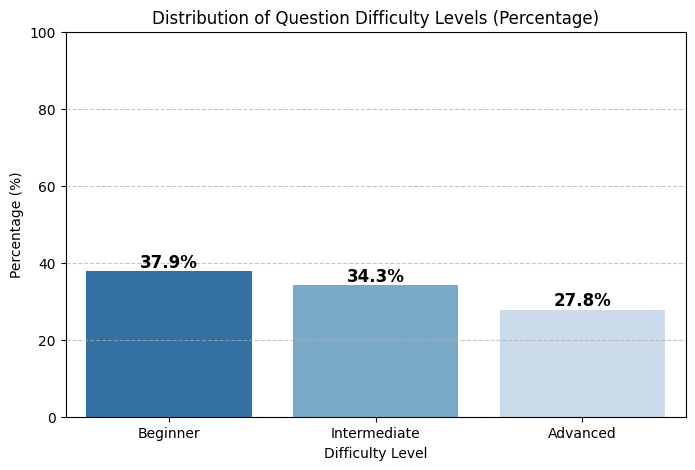

<Figure size 100x100 with 0 Axes>

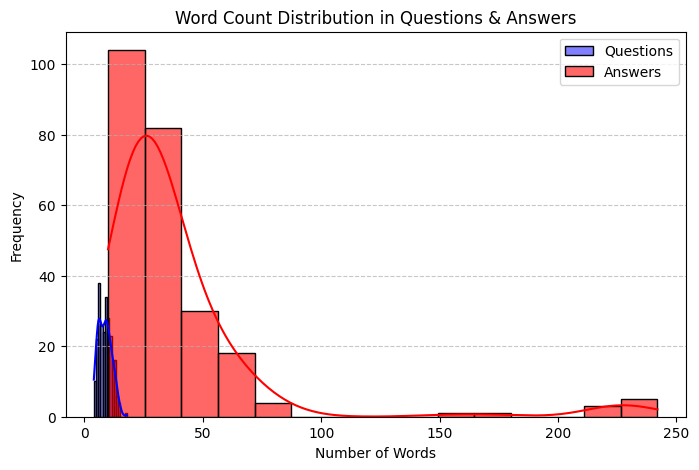

<Figure size 100x100 with 0 Axes>

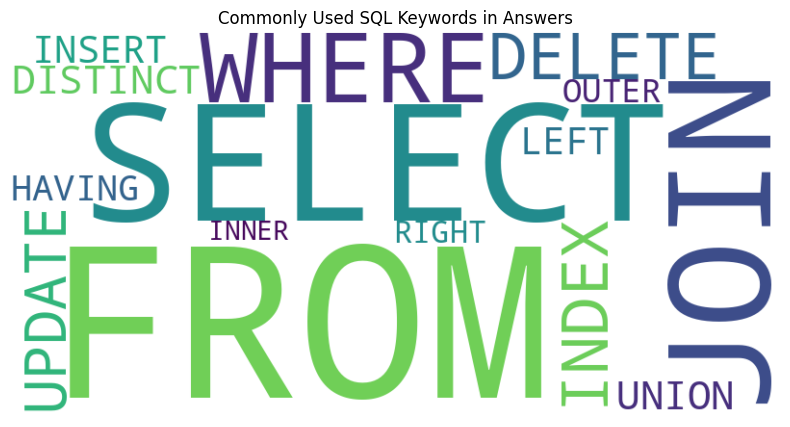

<Figure size 100x100 with 0 Axes>

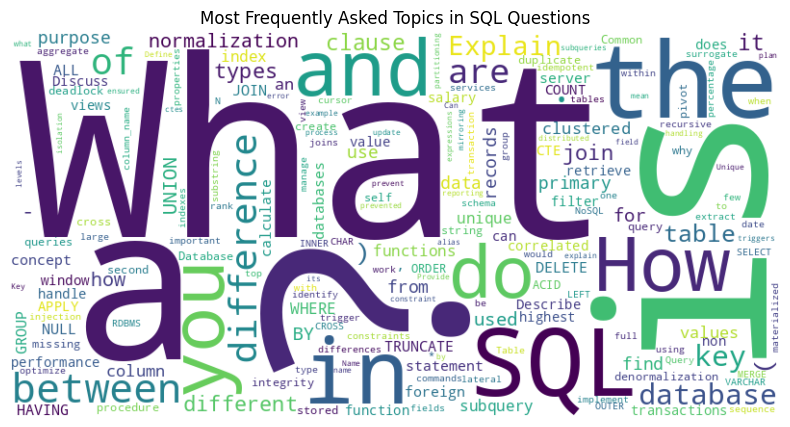

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import ast

# Load the preprocessed SQL dataset
file_path_sql = "preprocessed_sql_interview_QA_Final.csv"  # Ensure this file exists in your directory
df_sql = pd.read_csv(file_path_sql)

# Function to safely convert tokenized text from string back to list
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except (ValueError, SyntaxError):
        return val

# Convert tokenized text safely
df_sql["Tokenized_Question"] = df_sql["Word_Tokens_Question"].apply(safe_literal_eval)
df_sql["Tokenized_Answer"] = df_sql["Word_Tokens_Answer"].apply(safe_literal_eval)

# --------- 1. Distribution of Question Difficulty Levels (Percentage) ---------
level_counts_sql = df_sql["Level"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=level_counts_sql.index, y=level_counts_sql.values, palette="Blues_r")
plt.title("Distribution of Question Difficulty Levels (Percentage)")
plt.xlabel("Difficulty Level")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the percentage on bars
for i, v in enumerate(level_counts_sql.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=12, fontweight="bold")

plt.show()

# Add spacing between graphs
plt.figure(figsize=(1, 1))
plt.show()

# --------- 2. Word Count Analysis ---------
df_sql["Question_Word_Count"] = df_sql["Tokenized_Question"].apply(len)
df_sql["Answer_Word_Count"] = df_sql["Tokenized_Answer"].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df_sql["Question_Word_Count"], bins=15, kde=True, color="blue", label="Questions")
sns.histplot(df_sql["Answer_Word_Count"], bins=15, kde=True, color="red", label="Answers", alpha=0.6)
plt.title("Word Count Distribution in Questions & Answers")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Add spacing between graphs
plt.figure(figsize=(1, 1))
plt.show()

# --------- 3. Commonly Used SQL Keywords (Word Cloud) ---------
# Define a list of common SQL keywords
sql_keywords = ["SELECT", "FROM", "WHERE", "JOIN", "INNER", "OUTER", "LEFT", "RIGHT", "GROUP BY", "ORDER BY",
                "HAVING", "INSERT", "UPDATE", "DELETE", "DISTINCT", "UNION", "PRIMARY KEY", "FOREIGN KEY", "INDEX"]

# Flatten all tokenized words from answers into one list
all_answer_words_sql = [word.upper() for tokens in df_sql["Tokenized_Answer"] for word in tokens]

# Filter only SQL keywords
filtered_sql_keywords = [word for word in all_answer_words_sql if word in sql_keywords]

# Generate word frequency for SQL keywords
sql_word_freq = Counter(filtered_sql_keywords)

# Generate word cloud
wordcloud_sql = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(sql_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sql, interpolation="bilinear")
plt.axis("off")
plt.title("Commonly Used SQL Keywords in Answers")
plt.show()

# Add spacing between graphs
plt.figure(figsize=(1, 1))
plt.show()

# --------- 4. Most Frequently Asked Topics (Word Cloud) ---------
# Flatten all tokenized words from questions into one list
all_question_words_sql = [word for tokens in df_sql["Tokenized_Question"] for word in tokens]

# Generate word frequency for most common words in questions
question_word_freq_sql = Counter(all_question_words_sql)

# Generate word cloud for question topics
wordcloud_questions = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(question_word_freq_sql)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_questions, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequently Asked Topics in SQL Questions")
plt.show()


<ipython-input-13-3d7f6eac9770>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.index, y=level_counts.values, palette="Blues_r")


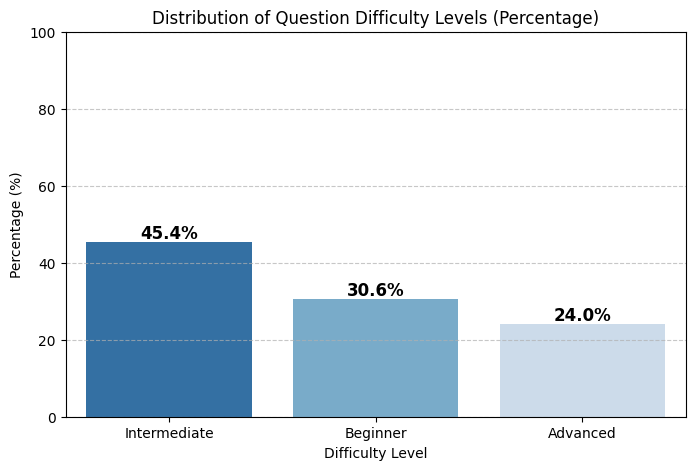

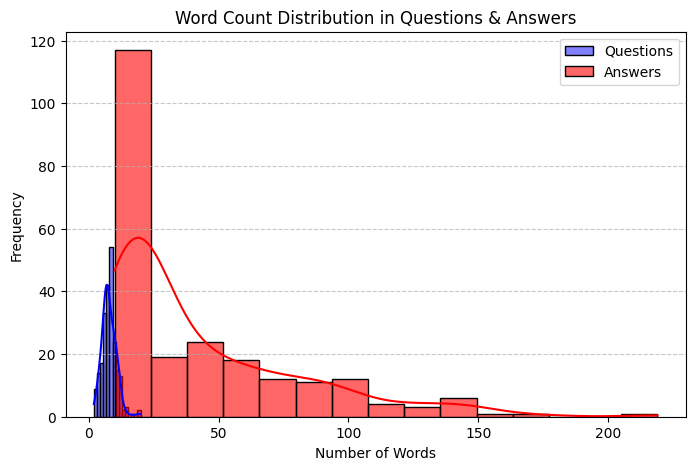

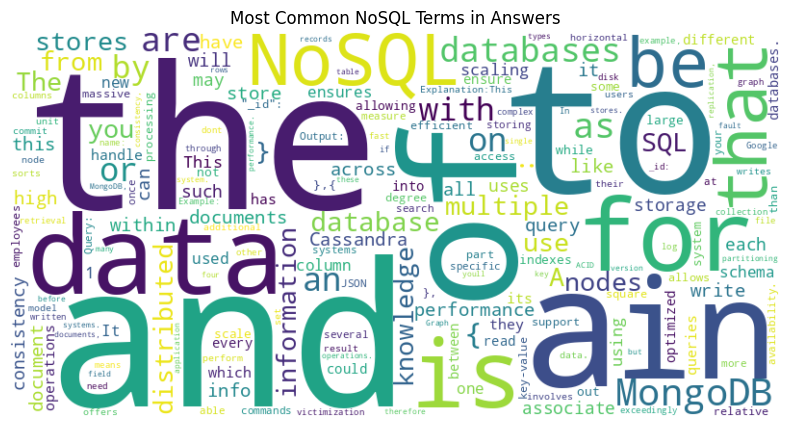

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import ast

# Load the preprocessed NoSQL dataset
file_path_nosql = "preprocessed_nosql_QA_dataset_Final.csv"  # Ensure this file exists in your directory
df_nosql = pd.read_csv(file_path_nosql)

# Function to safely convert string representations of lists back to lists
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except (ValueError, SyntaxError):
        return val  # Return original value if parsing fails

# Convert tokenized text from string back to lists safely
df_nosql["Tokenized_Question"] = df_nosql["Tokenized_Question"].apply(safe_literal_eval)
df_nosql["Tokenized_Answer"] = df_nosql["Tokenized_Answer"].apply(safe_literal_eval)

# --------- 1. Distribution of Question Difficulty Levels (Percentage) ---------
level_counts = df_nosql["Level"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=level_counts.index, y=level_counts.values, palette="Blues_r")
plt.title("Distribution of Question Difficulty Levels (Percentage)")
plt.xlabel("Difficulty Level")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the percentage on bars
for i, v in enumerate(level_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=12, fontweight="bold")

plt.show()

# --------- 2. Word Count Analysis ---------
df_nosql["Question_Word_Count"] = df_nosql["Tokenized_Question"].apply(len)
df_nosql["Answer_Word_Count"] = df_nosql["Tokenized_Answer"].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df_nosql["Question_Word_Count"], bins=15, kde=True, color="blue", label="Questions")
sns.histplot(df_nosql["Answer_Word_Count"], bins=15, kde=True, color="red", label="Answers", alpha=0.6)
plt.title("Word Count Distribution in Questions & Answers")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --------- 3. Most Common NoSQL Terms in Answers (Word Cloud) ---------
# Flatten all tokenized words from answers into one list
all_answer_words = [word for tokens in df_nosql["Tokenized_Answer"] for word in tokens]

# Generate word frequency
answer_word_freq = Counter(all_answer_words)

# Generate word cloud for answers
wordcloud_answers = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(answer_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_answers, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common NoSQL Terms in Answers")
plt.show()
